# ArviZ and Xarray

This whole notebook is interactive!

If you are reading the slides from binder, press `space` to move to the next slide.  

*or*  

Follow along by running the code yourself!

# What is ArviZ?
`ArviZ` is a Python package for Bayesian statisticians  

`ArviZ` aids users with analysis, data storage, diagnostics, plotting, model checking, and comparison, collaboration and more.

`Xarray` is a critical dependency makes data organization and handling very easy

![ArviZ Gallery](img/ArviZGallery.png)

# Who Am I?
* A Xarray and ArviZ user
* A PyMC3 and ArviZ Core Developer
* Definitely a Bayesian
* Someone who's opinions are my own and not of any employer
* You can follow me twitter or github **@canyon289**


<center><img width="500px" src="img/ArvizLogo.png"/></center>
<center><img width="500px" src="img/PyMC3.png"/></center>

# How do ArviZ developers and users feel about Xarray?


# How do ArviZ developers and users feel about Xarray?

<center style="font-size:200px">We think Xarray AWESOME</center>


# TLDR: ArviZ <3 Xarray
The Xarray functionality 
* allows for a nice ArviZ API and easily human readable code for a more efficient single user workflow
* enables data serialization, to disk, for a group collaboration and multi user workflow
* data schema consistency enabling easier API for packages such as ArviZ 

#  ArviZ + Xarray = az.InferenceData
* The central data structure to ArviZ is `az.InferenceData`. 
* It is essentially an object composed of `xr.DataSet` objects with semantically meaningful names
* Includes additional functionality useful in Bayesian workflows

![InferenceDataStructure](img/InferenceDataStructure.png)

# But how do we know ArviZ developers and users like Xarray?

As a statistician it's bad form to answer a question without data and math.  

In preparation for this user form we ran an exhaustive survey 


# Survey Methodology
1. Find an xarray and ArviZ user, a chair, and a mirror
2. Have that user sit in the chair
    * Mirror must be exactly 6 inches away from face. See diagram on right for exact placement
3. Ask yourself "Do you like xarray? True or False"
4. Carefully record the results.
    * Repeat step 3 and 4
    * Now repeat 9 more times

*Any deviation from this procedure will invalidate study

# 
![Serious Science](img/SeriousScience.jpeg)
Data Collection Diagram for reproducibility purposes

In [1]:
import xarray as xr
import numpy as np
data = xr.DataArray(np.ones((1,10), dtype=bool),
                    dims=("respondent", "response"),
                    coords={"respondent":np.arange(1), "response": np.arange(10)})
data[:, 8] = False
data

<xarray.DataArray (respondent: 1, response: 10)>
array([[ True,  True,  True,  True,  True,  True,  True,  True, False,
         True]])
Coordinates:
  * respondent  (respondent) int64 0
  * response    (response) int64 0 1 2 3 4 5 6 7 8 9

# Survey Results

In [14]:
data


<xarray.DataArray (respondent: 1, response: 10)>
array([[ True,  True,  True,  True,  True,  True,  True,  True, False,
         True]])
Coordinates:
  * respondent  (respondent) int64 0
  * response    (response) int64 0 1 2 3 4 5 6 7 8 9

and it looks like we got 9 True and 1 False!

# What can we infer about the unobservable user  preference?
* 10 data points are great and all but how do we know it wasn't just a fluke?
* Let's use statistics to make an *inference* about the unknown value, proportion of _"yes! Its True I like xarray"_  from the observed data 

## What every Bayesian wants:  A well estimated posterior distribution
A posterior *distribution* describes *every* possible user preference and the relative probability of each. 

# Bayesian Model and MCMC Sampling
We can declare a probabilistic model and our sampler. This one way in which computational Bayesians estimate posterior distributions

In [15]:
import pymc3 as pm
with pm.Model() as user_model:
    # Model definition
    true_proportion = pm.Uniform("true_proportion", 0,1)
    obs = pm.Binomial("obs", p=true_proportion, n=data.shape[1], observed=data.sum())
     
    # Markov Chain Monte Carlo Sampler
    inf_data = pm.sample(chains=4, tune=2000, draws=4000, return_inferencedata=True)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [true_proportion]


Sampling 4 chains for 2_000 tune and 4_000 draw iterations (8_000 + 16_000 draws total) took 3 seconds.
The acceptance probability does not match the target. It is 0.9185830192277574, but should be close to 0.8. Try to increase the number of tuning steps.


# What is happening
In Markov Chain Monte Carlo there is an algorithm that estimates posterior by taking a lot of samples. Practically speaking we get a lot of floating point numbers

In [4]:
# Credit to Colin Carroll for this video
from IPython.display import Video
Video("img/sampling.video.mp4")

# What we get: So many floating point numbers.
But luckily we can use `xr.DataSet` to handily keep track of them!

In [5]:
inf_data.posterior

<xarray.Dataset>
Dimensions:          (chain: 4, draw: 4000)
Coordinates:
  * chain            (chain) int64 0 1 2 3
  * draw             (draw) int64 0 1 2 3 4 5 ... 3994 3995 3996 3997 3998 3999
Data variables:
    true_proportion  (chain, draw) float64 0.8485 0.8485 ... 0.9177 0.9467
Attributes:
    created_at:                 2021-05-21T03:42:10.279801
    arviz_version:              0.11.2
    inference_library:          pymc3
    inference_library_version:  3.11.2
    sampling_time:              3.6063055992126465
    tuning_steps:               2000

# Standard Array formats make (and  plotting) easy!
Due to Xarray's labels ArviZ just "knows" where things are and can do the "right thing".  
As developers Xarray makes our code simpler, for users it makes the API awesome.

##### Check out this rank plot (a diagnostic for MCMC sampling)

<class 'xarray.core.dataset.Dataset'>


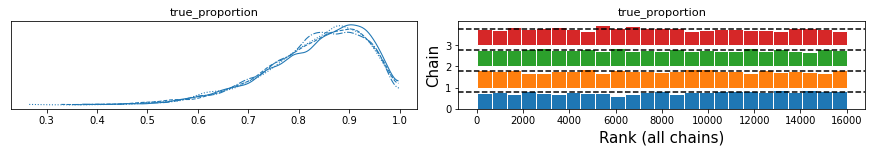

In [6]:
import arviz as az
print(type(inf_data.posterior))
az.plot_trace(inf_data, kind="rank_bars");

# And our coveted posterior plot!

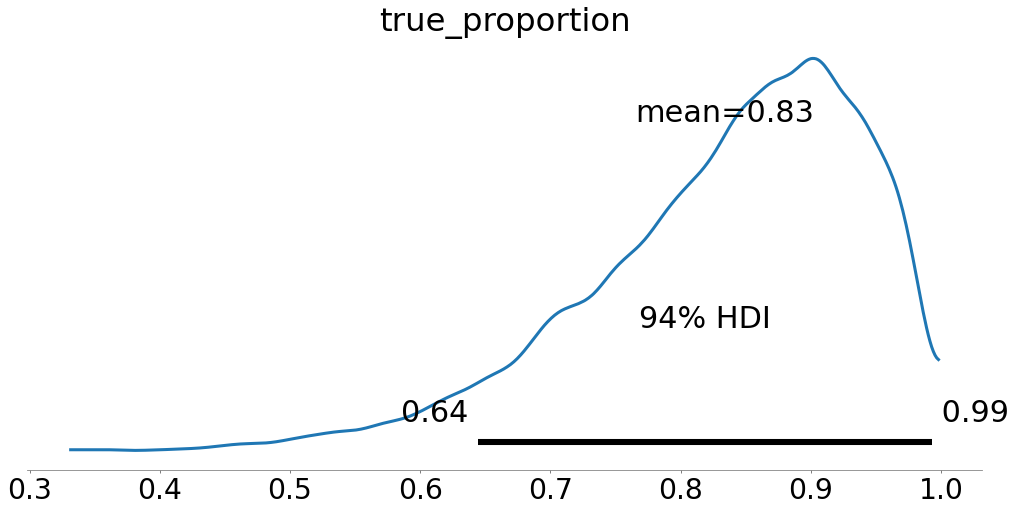

In [22]:
az.plot_posterior(inf_data, figsize=(14,7));

# But posterior distributions not even all of it
Inference runs generate a lot more numbers 

In [8]:
inf_data

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

These numbers are useful for other purposes like diagnostics and its handy to keep track of them in a simple way

# And inference is just one part of the workflow
There are many steps and Probabilistic Programming Languages only help out with some of them. ArviZ aims to help with the others.

![Bayesian Workflow](img/Bayesian_workflow_Updated.png)

# But now there's so many arrays
* Prior Predictive
* Posterior
* Divergences
* Log probabilities for diagnostics
* All the above per parameter + different shapes in hierarchical models

Dataframes with integrated indexing proved valuable for analysis. Bayesian data is high dimensional and shares many of the challenges. 


# The answer: More Xarray Datasets!
One `az.InferenceData` group to capture every type of array a Bayesian could want

In [9]:
radon_dataset = az.load_arviz_data("radon")
radon_dataset

Inference data with groups:
	> posterior
	> posterior_predictive
	> log_likelihood
	> sample_stats
	> prior
	> prior_predictive
	> observed_data
	> constant_data

# And we can serialize InfData to disk
Xarray + InfData conforms to NetCDF4 file format specification quite conveniently

In [10]:
path = "xarray_user_forum_2021"
filename = "I_DONT_HAVE_TO_RUN_THIS_AGAIN_THIS_IS_AMAZING.nc"
inf_data.to_netcdf(filename)

'I_DONT_HAVE_TO_RUN_THIS_AGAIN_THIS_IS_AMAZING.nc'

In [11]:
loaded_inf_data = az.from_netcdf(filename)
loaded_inf_data

Inference data with groups:
	> posterior
	> log_likelihood
	> sample_stats
	> observed_data

# Remember this picture?
Hopefully it now makes sense how we got here
![InferenceDataStructure](img/InferenceDataStructure.png)

# What was like life before Inf Data
Random arrays in memory
* Integer index so we'd forget what all these indices were. 
    * _`trace[0][:100][2][-2]` is not fun to debug._  
    
* Incompatible formats between Probabilistic Programming Languages.
    * _"What do you mean you use Stan?_ 
    
* Every Probabilistic Programming Language implememented their own diagnostics
    * _Let's rewrite trace plots in *our* library_
* Serializing all this to disk coherently and sharing the results was difficult
    * *Rerunning my results will take 2 hours. Each time*

# Xarray enables
* Better single user workflow by making it so nice to work with multi dimensional arrays
* Better multi user workflow by making it easy to share and store results across teams
* Unified API for plotting and diagnostics due to convenient object structure and array handling

# Where did that one `False` come from?
Sometimes API is difficult or obtuse to use in our use case  
But! Xarray provides many escape hatches to other formats like numpy or dataframes so we can get what we need

In [12]:
# Getting unique count
radon_data = az.load_arviz_data("radon")
radon_data.observed_data.to_dataframe().index.unique().shape

(919,)

# What we're 100% sure about: The Xarray devs are  great!
* Xarray devs have been very generous their time and expertise with ArviZ devs.
* We really appreciate their support
* Library continues to make great progress and we're thrilled to grow with it

# But what about Dask
Yep, Dask is awesome too! We've continued to integrate Dask functionality to speed up diagnostic processing or for `az.InferenceData` objects that won't fit in memory.

<center><img src="img/ArviZXarray.jpg"/></center>

# More information

* https://arviz-devs.github.io/arviz/
* https://arviz-devs.github.io/ArviZ.jl/stable/
* https://arviz-devs.github.io/arviz/notebooks/XarrayforArviZ.html
* https://arviz-devs.github.io/arviz/schema/schema.html

# Questions?